# Chapter 12 -- Additional Data Handling --DRAFT

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Sort-and-Sort-Sequences">Sort and Sort Sequences</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Drop/Keep-Columns">Drop/Keep Columns</a> 

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Rename-Columns">Rename Columns</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Finding-Duplicate-Values">Finding Duplicate Values</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Flattening-DataFrames">Flattening DataFrames</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Appending-Rows">Appending Rows</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Groupby">Groupby</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Groupby">Concatenation (analagous to SAS SET operations)</a>

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Sort and Sort Sequences

The example below is used in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Time-Series-Walk-Through">Time Series Walk-Through</a> in Chapter 09 -- Panda Time Series and Date Handling.  It uses the read_csv() method to create the 'df_us' DataFrame begin reading at row 3,082 of the .csv file.

In [3]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",                 
            skiprows=3082,
            usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
            names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
            header=None)

The following SAS Data Step reads the same .csv file using FIRSTOBS= to begin reading from an arbitary row position.

````
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3081; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

Verify the read using the .shape attribute.

In [4]:
df_states.shape

(96244, 9)

Inspect the first 5 rows of the DataFrame.

In [5]:
df_states.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
0,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,4,94.95
1,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,1,100.91
2,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,2,100.76
3,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,3,94.02
4,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,4,91.43


Inspect the first 5 rows of the SAS data set df_states.

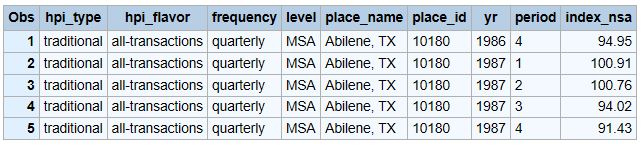

In [6]:
Image(filename='Anaconda3\\output\\df_states_output.JPG')  

Begin by examing the default sort.  We supply the minimum argument to the .sort_values attribute, the sort key in the example below.  The sort operation creates the new 'default_srt' DataFrame.

In [7]:
default_srt = df_states.sort_values('index_nsa')

Display the first 4 rows of the sorted DataFrame 'default_srt'

In [8]:
default_srt.iloc[0:4]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
42692,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,1975,3,18.31
42856,traditional,all-transactions,quarterly,MSA,"San Jose-Sunnyvale-Santa Clara, CA",41940,1975,4,18.82
48737,traditional,all-transactions,quarterly,MSA,"Honolulu ('Urban Honolulu'), HI",46520,1981,4,18.91
42693,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,1975,4,19.26


By examing the first the first four rows of the sorted DataFrame, 'default_srt' above, we see the default sort sequence is ascending.  Of course, by reading the doc for <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a> we could 'see' this as well. 

The default SAS sort syntax is:

````
    30        proc sort data=df_states;
    31           by index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
    32        
    33         data first4;
    34            set df_states (obs=4);
    35            by index_nsa;
````

Like pandas, the default SAS sort sequence is ascending.  And this is confirmed by the SAS doc located <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#sort-overview.htm"> here </a>.

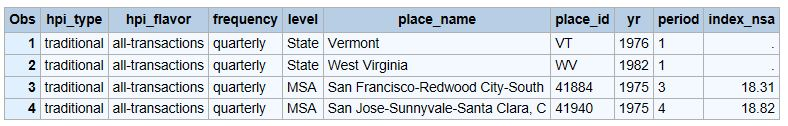

In [9]:
Image(filename='Anaconda3\\output\\default_first_four.JPG')  

However, in contrast to the panda default sort, the default SAS sort sequence places its missing values first in the data set as illustrated above.

By displaying the last 4 rows in the 'default_srt' DataFrame we find the 2 NaN's sorted last since this is the default location panda places its missing values.

In [10]:
default_srt.tail(4)  

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
54262,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,1,780.98
54263,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,2,791.71
60576,traditional,all-transactions,quarterly,State,Vermont,VT,1976,1,NaN
61098,traditional,all-transactions,quarterly,State,West Virginia,WV,1982,1,NaN


Since the panda default sort sequence places NaN's last in the sort sequence by default this can be used an alternative to using <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">boolean operators and the .loc() method</a> to detect missing values.

The SAS program to access the last four observations in the data set is:

````
    79         data last4;  
    80           set df_states (firstobs=96241);
    81           by index_nsa;

    NOTE: 4 observations were read from "WORK.last4"
````    

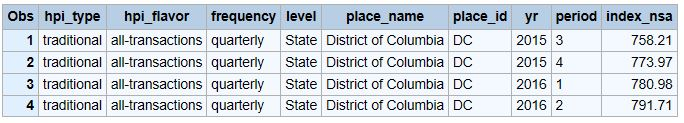

In [11]:
Image(filename='Anaconda3\\output\\sort_last_four.JPG')  

We can alter the organization of the data_frame by supplying arguments and values to the sort_values attribute.  The example below sorts using a descending sort sequence and places missing values at the beginning.

In [12]:
states_desc = df_states.sort_values('index_nsa', ascending=False, na_position='first')

Setting the na_position= argument to 'first' places NaN's at the beginning of the sort sequence.  This is the same beavhior for SAS' sort sequence.  Details describing SAS sort order for missing values is descried <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p0tmoipp0ci6wkn0z27ev47sv0ov.htm"> here </a>.

The first two rows in the DataFrame 'states_desc' contain the NaN's values for the 'index_nsa' column, while the next 2 rows contain the highest values.

In [13]:
states_desc.iloc[0:4,]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
60576,traditional,all-transactions,quarterly,State,Vermont,VT,1976,1,NaN
61098,traditional,all-transactions,quarterly,State,West Virginia,WV,1982,1,NaN
54263,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,2,791.71
54262,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,1,780.98


SAS has missing 28 missing value indicators for numerics described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p175x77t7k6kggn1io94yedqagl3.htm"> here </a>.  However, if you want missing values to be 'first' in a data set using an ascending sort sequence, then the missing value indicator must be an actual numeric value larger than the largest non-missing value.  In other words, by default, the SAS missing value indicator for numerics is always the smallest numeric value.

The SAS example below sorts the df_states data set in descending order by the 'index_nsa' variable.  Like the panda example above, the 

    out=states_srt2
    
syntax creates the new SAS data set 'states_srt2'. 

The U.K. accidents data has three files:
    
    1.  Accidents file with a unique key for the accident index column
    2.  Casualties file with 1 or more rows keyed to the accident index column
    3.  Vehicles file with 1 or more rows keyed to the accident index column

####    1. Read the accidents file and create the 'accident' DataFrame

Read the Road Safety file and parse the date column naming it 'date_idx'.  Return the info on the DataFrame.

In [14]:
file_loc = "C:\\Data\\Accidents_2015.csv"
accident = pd.read_csv(file_loc,
           low_memory=False, 
           parse_dates={'date_idx': [9]})
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139972 entries, 0 to 139971
Data columns (total 32 columns):
date_idx                                       139972 non-null datetime64[ns]
Accident_Index                                 139972 non-null object
Location_Easting_OSGR                          139945 non-null float64
Location_Northing_OSGR                         139945 non-null float64
Longitude                                      139945 non-null float64
Latitude                                       139945 non-null float64
Police_Force                                   139972 non-null int64
Accident_Severity                              139972 non-null int64
Number_of_Vehicles                             139972 non-null int64
Number_of_Casualties                           139972 non-null int64
Day_of_Week                                    139972 non-null int64
Time                                           139954 non-null object
Local_Authority_(District)                

Using PROC IMPORT to read the accident .csv file.  The subsequent Data Step uses both the RENAME and KEEP options.

````
    3       proc import datafile="C:\Data\Accidents_2015.csv"
    4            dbms=csv
    5            out=get_acc
    6            replace;

    11       data accident(rename=(Accident_Index          = index
    12                             Accident_Severity       = severity
    13                             Number_of_Vehicles      = vehicles
    14                             Number_of_Casualties    = casualties
    15                             Day_of_Week             =   day
    16                             Road_Surface_Conditions = surface
    17                             Light_Conditions        = light
    18                             Speed_limit             = speed
    19                             Weather_Conditions      = weather));
    20       
    21         set get_acc(keep =  Accident_Index
    22                             Accident_Severity
    23                             Number_of_Vehicles
    24                             Number_of_Casualties
    25                             Day_of_Week
    26                             Road_Surface_Conditions
    27                             Light_Conditions
    28                             Speed_limit
    29                             Weather_Conditions);

    NOTE: 139972 observations were read from "WORK.get_acc"
    NOTE: Data set "WORK.accident" has 139972 observation(s) and 9 variable(s)
````

Display the first 5 observations of the 'accident' data set.

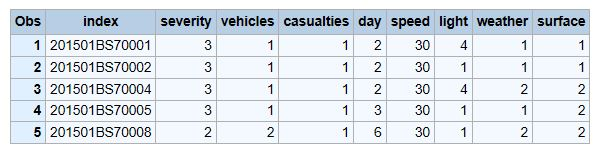

In [15]:
Image(filename='Anaconda3\\output\\acc_output.JPG')  

 ####    2. Read the vehicles file and create the 'vehicle' DataFrame

Read the Vehicle file, supplying a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple</a> of integers for the usecols= argument and a tuple of names for the column labels.

In [16]:
vehicle = pd.read_csv("C:\\Data\\Vehicles_2015.csv", 
          low_memory=False,            
          usecols=(0, 1, 2, 14, 15, 17, 18, 19),
          names=('index', 'v_reference', 'v_type', 'v_sex', 'v_age', 'engine_size', 'engine_type', 'vehicle_age'),
          skiprows=1,
          header=None)
vehicle.set_index('index', inplace=True, drop=False)
vehicle.shape

(257899, 8)

In [17]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257899 entries, 201501BS70001 to 2.02E+12
Data columns (total 8 columns):
index          257899 non-null object
v_reference    257899 non-null int64
v_type         257899 non-null int64
v_sex          257899 non-null int64
v_age          257899 non-null int64
engine_size    257899 non-null int64
engine_type    257899 non-null int64
vehicle_age    257899 non-null int64
dtypes: int64(7), object(1)
memory usage: 17.7+ MB


````
    13       proc import datafile="c:\data\DfTRoadSafety_Vehicles_2015.csv" dbms=csv out=vehicles replace;  
    14
    15       
    16       data vehicle(rename=(Accident_Index = index
    17                            Vehicle_Reference = v_reference
    18                            Vehicle_Type = v_type
    19                            Sex_of_Driver = v_sex
    20                            Age_of_Driver = v_age
    21                            Engine_Capacity = engine_size
    22                            Propulsion_Code = engine_type
    23                            Age_of_Vehicle = vehicle_age));
    24       
    25          set vehicles (keep = Accident_Index
    26                              Vehicle_Reference
    27                              Vehicle_Type
    28                              Sex_of_Driver
    29                              Age_of_Driver
    30                              Engine_Capacity
    31                              Propulsion_Code
    32                              Age_of_Vehicle); 
````

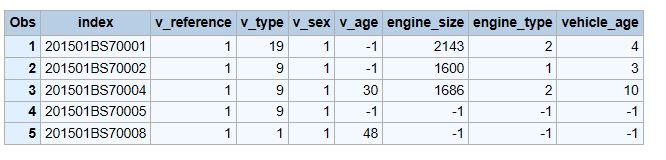

In [18]:
Image(filename='Anaconda3\\output\\vehicles_5_obs.JPG')  

####    3. Read the causality file and create the 'casual' DataFrame

In [19]:
casual = pd.read_csv("C:\\Data\\Casualties_2015.csv", 
          low_memory=False,            
          usecols=(0, 1, 2, 3, 4, 5, 7, 13),
          names=('index', 'cv_reference', 'c_reference','c_class', 'c_sex', 'c_age', 'severity',
                 'c_type'),
          skiprows=1,
          header=None)

casual.shape

(186189, 8)

## Drop/Keep Columns

Drop some of the columns in the 'accident' DataFrame.

In [20]:
accident = accident[['Accident_Index', 'Accident_Severity', 'date_idx', 'Number_of_Vehicles', 
                     'Number_of_Casualties', 'Day_of_Week', 'Road_Surface_Conditions', 'Time', 'Light_Conditions', 
                     'Speed_limit',  'Weather_Conditions']]

## Rename Columns

In [21]:
accident = accident.rename(columns = {
           'Accident_Index'         :'index',
           'Accident_Severity'      :'severity',
           'Number_of_Vehicles'     :'vehicles',
           'Number_of_Casualties'   :'casualties',
           'Day_of_Week'            :'day',
           'Road_Surface_Conditions':'surface',
           'Light_Conditions'       :'light',
           'Speed_limit'            :'speed',
           'Weather_Conditions'     :'weather'
    })

Lower-case all the 'accident' DataFrame column names.

In [22]:
accident.columns = map(str.lower, accident.columns)

Display the first 5 rows of the 'accident' DataFrame.

In [23]:
accident.head(5)

,index,severity,date_idx,vehicles,casualties,day,surface,time,light,speed,weather
0,201501BS70001,3,2015-12-01,1,1,2,1,18:45,4,30,1
1,201501BS70002,3,2015-12-01,1,1,2,1,7:50,1,30,1
2,201501BS70004,3,2015-12-01,1,1,2,2,18:08,4,30,2
3,201501BS70005,3,2015-01-13,1,1,3,2,7:40,1,30,1
4,201501BS70008,2,2015-09-01,2,1,6,2,7:30,1,30,2


In [24]:
accident.set_index('index', inplace=True, drop=False)

## Finding Duplicate Values

In the accident file, we expect to find no duplicate index values.  Setting the .duplicated attribute to False returns all of the duplicate values, in our case for the 'index' column.  The .duplicated attribute for DataFrames is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html"> here</a>.

False marks all duplicate values as True.  Create the new 'acc_dup_idx' DataFrame containing the duplicates for the column 'index' column.  If its length is zero, then there are no duplicates.

In [25]:
acc_dup_idx = accident[accident.duplicated('index', False)]

In [26]:
len(acc_dup_idx)

0

In [27]:
casual.head()

,index,cv_reference,c_reference,c_class,c_sex,c_age,severity,c_type
0,201597UA71710,2,1,1,2,75,3,9
1,201597UA71810,2,1,2,2,63,2,11
2,201597UA71810,2,2,2,2,75,2,11
3,201597UA71810,2,3,2,1,78,2,11
4,201597UA71810,2,4,2,1,67,2,11


## Flattening DataFrames

In Chapter 06, Hierarchical Indexes cover the <a hre="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2006%20--%20Hierarchical%20Indexing.ipynb#stack()-and-unstack()-methods"> stack() and unstack() methods</a> for 'flattening' and 'stacking' rows or columns.  

In this example, we want to join the 'accident' and 'vehicle' DataFrames on the common key 'index' found in both.  Since there can be a many-to-one relationship between an accident event and the number of vehicles involved, we need to do the following:

    1.  Extract the duplicate rows from the 'vehicle' DataFrame into the 'v_dups' DataFrame
    2.  With the 'v_dup' DataFrame, form new 'index' values by concatenating 'v_dup.index' with 'v_dup.v_reference' values.
    3.  Extract the non-duplicate rows from the 'vehicle' DataFrame into the 'v_no_dups' DataFrame
    4.  Append the rows with modified 'v_dup.index' values to the 'v_no_dupes' DataFrame 

####    1.  Extract the duplicate rows from the 'vehicle' DataFrame into the 'v_dups' DataFrame
Start by reviewing the attribute information for the 'vehicle' DataFrame.

In [28]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257899 entries, 201501BS70001 to 2.02E+12
Data columns (total 8 columns):
index          257899 non-null object
v_reference    257899 non-null int64
v_type         257899 non-null int64
v_sex          257899 non-null int64
v_age          257899 non-null int64
engine_size    257899 non-null int64
engine_type    257899 non-null int64
vehicle_age    257899 non-null int64
dtypes: int64(7), object(1)
memory usage: 17.7+ MB


Create a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> Boolean mask</a> locating the duplicate values for the 'index' column.  The keep='first' argument behaves similiar to SAS FIRST.variable in BY-Group processing.  We want to ignore the first occurance of the duplicated 'index' column value and extract those that remain.

In [29]:
dup_mask = vehicle.duplicated('index', keep='first')

Create the 'v_dup' DataFrame by applying the Boolean mask.  

In [30]:
v_dups = vehicle.loc[dup_mask]

The length of the 'v_dups' DataFrame is the same as the length of the number of unique values for the 'index' column.

In [31]:
print("# of rows in 'v_dup' is equal to the # of unique values for 'index' is", len(v_dups)  == len(v_dups.index.unique()))
print('v_dups has', len(v_dups), 'rows')

# of rows in 'v_dup' is equal to the # of unique values for 'index' is False
v_dups has 177358 rows


####    2.  With the 'v_dup' DataFrame, form new 'index' values by concatenating 'v_dup.index' with 'v_dup.v_reference' values.

In [32]:
#v_dups['index'] = v_dups['index'] + v_dups['v_reference'].astype('str')

In [33]:
v_dups.loc['index'] = (v_dups['index'] + v_dups['v_reference'].astype('str'))

ValueError: cannot reindex from a duplicate axis

####   3.  Extract the non-duplicate rows from the 'vehicle' DataFrame into the 'v_no_dups' DataFrame

Use the logical NOT form of the dup_mask to extract the non-duplicate rows.

In [ ]:
v_no_dups = vehicle.loc[~dup_mask]

Test to determine if the combined lengths of the 'v_no_dups' and 'v_dups' DataFrame are equal to the length of the original 'accident' DataFrame. 

In [ ]:
len(v_no_dups) + len(v_dups)  == len(vehicle)

## Appending Rows

#### 4.  Append the rows with modified 'v_dup.index' values to the 'v_no_dupes' DataFrame 

In [ ]:
frames = [v_no_dups, v_dups]
acc2 = pd.concat(frames, axis=1)
acc2.shape

In [ ]:
#Concatenation of 2 columns from two DataFrames example:
#compare = pd.DataFrame({'df_us':df_us.date_idx, 'df_states':df_states.date_idx})

## Groupby 

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    